In [1]:
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()

In [32]:
import pandas as pd

In [43]:
# Create a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
df['target'] = iris.target

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df.shape

(150, 5)

In [46]:
df['target'].unique()

array([0, 1, 2])

In [47]:
#removing one species for binary classification
#removing tw column for making 2d data
df = df[df['target'] != 0][['sepal width (cm)','petal length (cm)','target']]

In [48]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

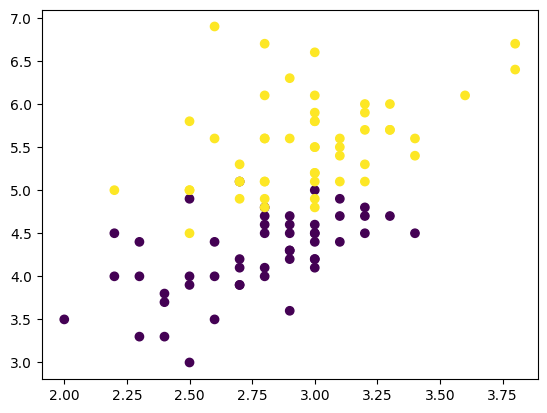

In [52]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'])

In [60]:
#taking only 10 rows for training
df = df.sample(100)  #this will mix the data by changing rows randomly
df_train = df.iloc[:60, :].sample(10) # it will make df of 10 random rows from 0-60 index
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80: , :].sample(5)

In [61]:
df_train #for training

,sepal width (cm),petal length (cm),target
97,2.9,4.3,1
84,3.0,4.5,1
66,3.0,4.5,1
73,2.8,4.7,1
99,2.8,4.1,1
104,3.0,5.8,2
106,2.5,4.5,2
135,3.0,6.1,2
103,2.9,5.6,2
132,2.8,5.6,2


In [88]:
df_val #for testing accuracy score

,sepal width (cm),petal length (cm),target
114,2.8,5.1,2
137,3.1,5.5,2
62,2.2,4.0,1
59,2.7,3.9,1
77,3.0,5.0,1


In [63]:
df_test #for end

,sepal width (cm),petal length (cm),target
148,3.4,5.4,2
116,3.0,5.5,2
139,3.1,5.4,2
92,2.6,4.0,1
51,3.2,4.5,1


In [64]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [65]:
X_test

array([[2.8, 5.1],
       [3.1, 5.5],
       [2.2, 4. ],
       [2.7, 3.9],
       [3. , 5. ]])

In [66]:
y_test

array([2, 2, 1, 1, 1])

## Bagging Case-1

In [67]:
# All will be Decision Tree for now

In [68]:
# Data for tree-1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
84,3.0,4.5,1
104,3.0,5.8,2
97,2.9,4.3,1
99,2.8,4.1,1
132,2.8,5.6,2
66,3.0,4.5,1
103,2.9,5.6,2
104,3.0,5.8,2


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [79]:
def evaluate(clf, X,y):  #clf=model, X,y = training datas
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test) #from X_val
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    

In [91]:
# dt-1
dt_bag1 = DecisionTreeClassifier() #max-depth= None (default) which means depth will be maximum

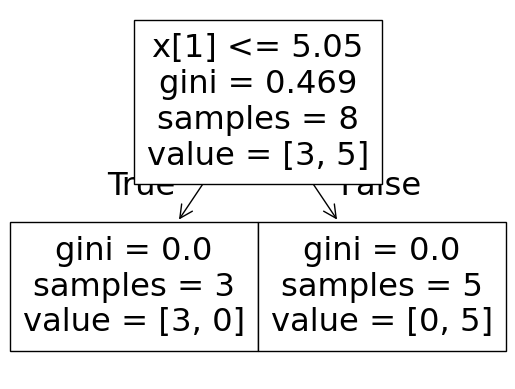

Accuracy Score :  1.0


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


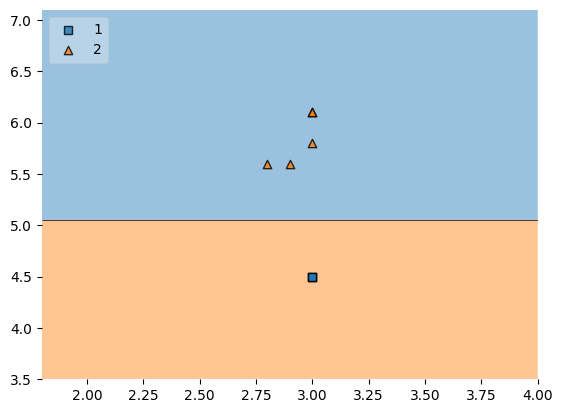

In [92]:
evaluate(dt_bag1,X,y)

In [82]:
# Data for tree-2
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
84,3.0,4.5,1
104,3.0,5.8,2
99,2.8,4.1,1
104,3.0,5.8,2
66,3.0,4.5,1
135,3.0,6.1,2
135,3.0,6.1,2
103,2.9,5.6,2


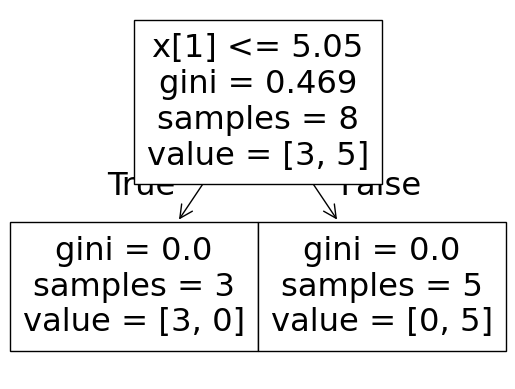

Accuracy Score :  1.0


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


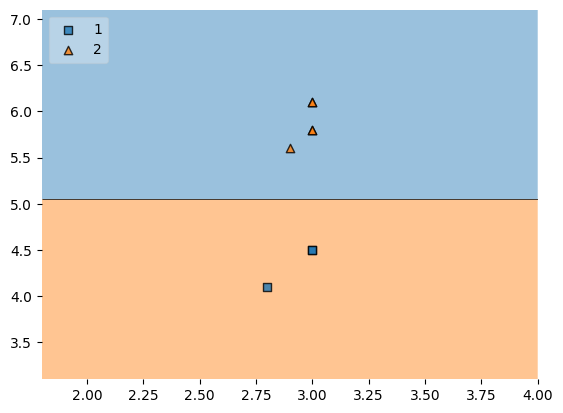

In [84]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [85]:
# Data for tree-3
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
84,3.0,4.5,1
84,3.0,4.5,1
132,2.8,5.6,2
135,3.0,6.1,2
84,3.0,4.5,1
103,2.9,5.6,2
135,3.0,6.1,2
104,3.0,5.8,2


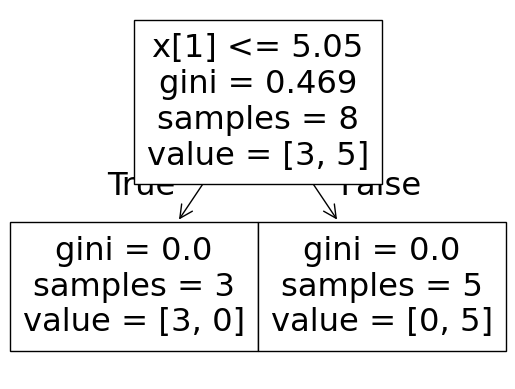

Accuracy Score :  1.0


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


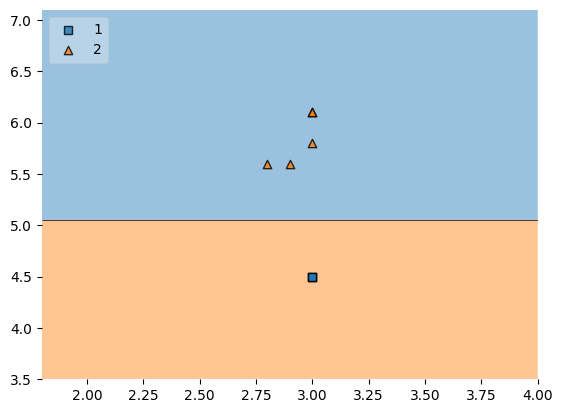

In [86]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [93]:
import numpy as np

In [87]:
df_test

,sepal width (cm),petal length (cm),target
148,3.4,5.4,2
116,3.0,5.5,2
139,3.1,5.4,2
92,2.6,4.0,1
51,3.2,4.5,1


In [96]:
print('Predictor 1 ',dt_bag1.predict(np.array([3.4,5.4]).reshape(1,2)) )
print('Predictor 2 ',dt_bag2.predict(np.array([3.4,5.4]).reshape(1,2)) )
print('Predictor 3 ',dt_bag3.predict(np.array([3.4,5.4]).reshape(1,2)) )


Predictor 1  [2]
Predictor 2  [2]
Predictor 3  [2]


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [97]:
print('Predictor 1 ',dt_bag1.predict(np.array([2.6,4.0]).reshape(1,2)) )
print('Predictor 2 ',dt_bag2.predict(np.array([2.6,4.0]).reshape(1,2)) )
print('Predictor 3 ',dt_bag3.predict(np.array([2.6,4.0]).reshape(1,2)) )



Predictor 1  [1]
Predictor 2  [1]
Predictor 3  [1]


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Other types of bagging is also a same with the different conditions only

- Bagging
  - Row sampling
  - with replacement

- Pasting
  - Row sampling
  - without replacement

- Random Subspaces
  - Column sampling
  - with or without replacement

- Random Patches
  - Row & Column both sampling
  - with replacement

In [100]:
#note for column just add >> axis = 1
# for example
df_train.sample(2,replace=True, axis=1)

,petal length (cm),target
97,4.3,1
84,4.5,1
66,4.5,1
73,4.7,1
99,4.1,1
104,5.8,2
106,4.5,2
135,6.1,2
103,5.6,2
132,5.6,2


## Thank you 